In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [195]:
chunk = 150000

In [196]:
train = pd.read_csv('data/train.csv', chunksize = chunk) #generator
trained_dfs = []
for i in range(20):
    trained_dfs.append(next(train))

In [18]:
trained_dfs[0].head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [19]:
trained_dfs[0].shape

(500000, 2)

In [20]:
trained_dfs[1].head()

,acoustic_data,time_to_failure
500000,1,1.3393
500001,-2,1.3393
500002,0,1.3393
500003,1,1.3393
500004,2,1.3393


In [21]:
train_samp = pd.DataFrame(trained_dfs[0])
earthquake=[0]
train_samp.time_to_failure.isin(earthquake) #time_to_failure does not go to 0

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
499970    False
499971    False
499972    False
499973    False
499974    False
499975    False
499976    False
499977    False
499978    False
499979    False
499980    False
499981    False
499982    False
499983    False
499984    False
499985    False
499986    False
499987    False
499988    False
499989    False
499990    False
499991    False
499992    False
499993    False
499994    False
499995    False
499996    False
499997    False
499998    False
499999    False
Name: time_to_failure, L

In [22]:
min(trained_dfs[0].time_to_failure)

1.3392996675

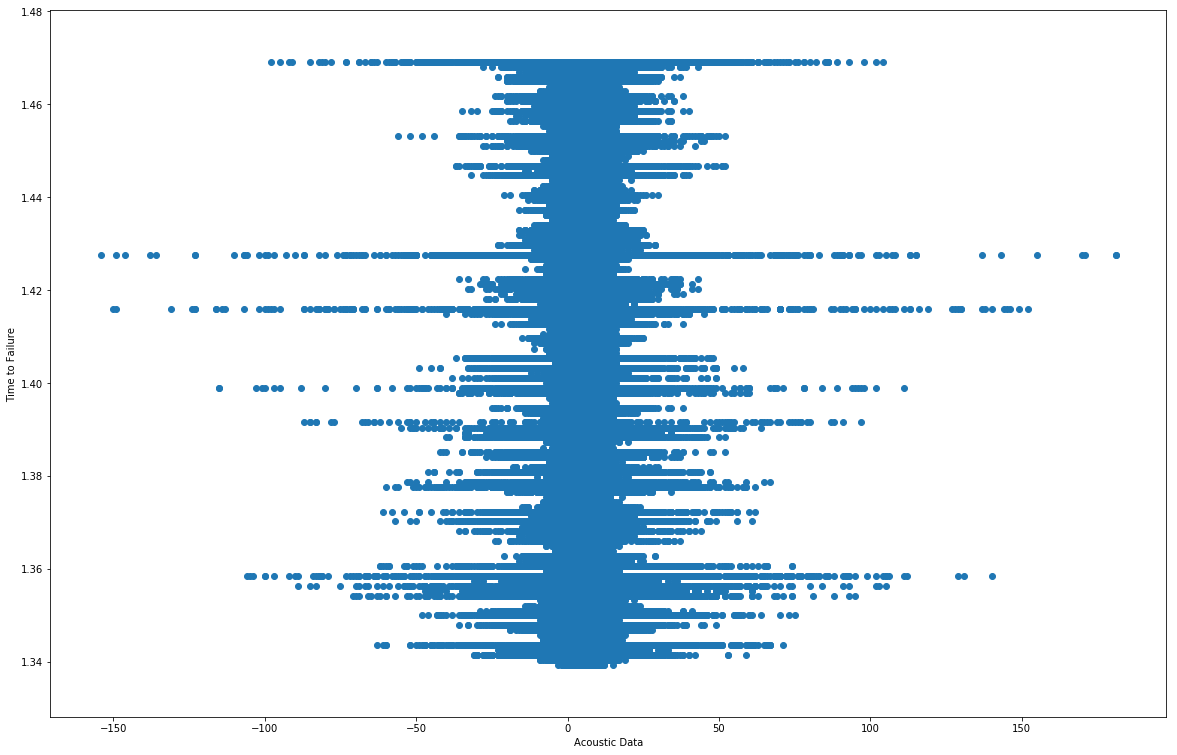

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 13)
plt.scatter(train_samp.acoustic_data,train_samp.time_to_failure,)
plt.xlabel('Acoustic Data')
plt.ylabel('Time to Failure')
plt.show()
# What patterns are observed with the data?
# Earthquake occurs when acoustic data =0
# What patterns exist with the time to failure data and acoustic data... use to predit
# Consider statistics like kurtosis, threshold, 

In [24]:
np.mean(trained_dfs[0].acoustic_data)

4.839246

In [25]:
min(trained_dfs[0].acoustic_data)

-154

In [26]:
def add_time_column(df,increment=0.000000250):
    times=[]
    set_value=0
    for i in range(0,len(df)):
        times.append(set_value)
        set_value+=increment
    return times

In [27]:
trained_dfs[0]['experimental_run_time']=add_time_column(trained_dfs[0])
trained_dfs[0].head()

,acoustic_data,time_to_failure,experimental_run_time
0,12,1.4691,0.000000e+00
1,6,1.4691,2.500000e-07
2,8,1.4691,5.000000e-07
3,5,1.4691,7.500000e-07
4,8,1.4691,1.000000e-06


In [28]:
for i in range(len(trained_dfs)):
    trained_dfs[i]['experimental_run_time']=add_time_column(trained_dfs[i])
    trained_dfs[i]['ID']=trained_dfs[i].index

trained_dfs[1].head()

,acoustic_data,time_to_failure,experimental_run_time,ID
500000,1,1.3393,0.000000e+00,500000
500001,-2,1.3393,2.500000e-07,500001
500002,0,1.3393,5.000000e-07,500002
500003,1,1.3393,7.500000e-07,500003
500004,2,1.3393,1.000000e-06,500004


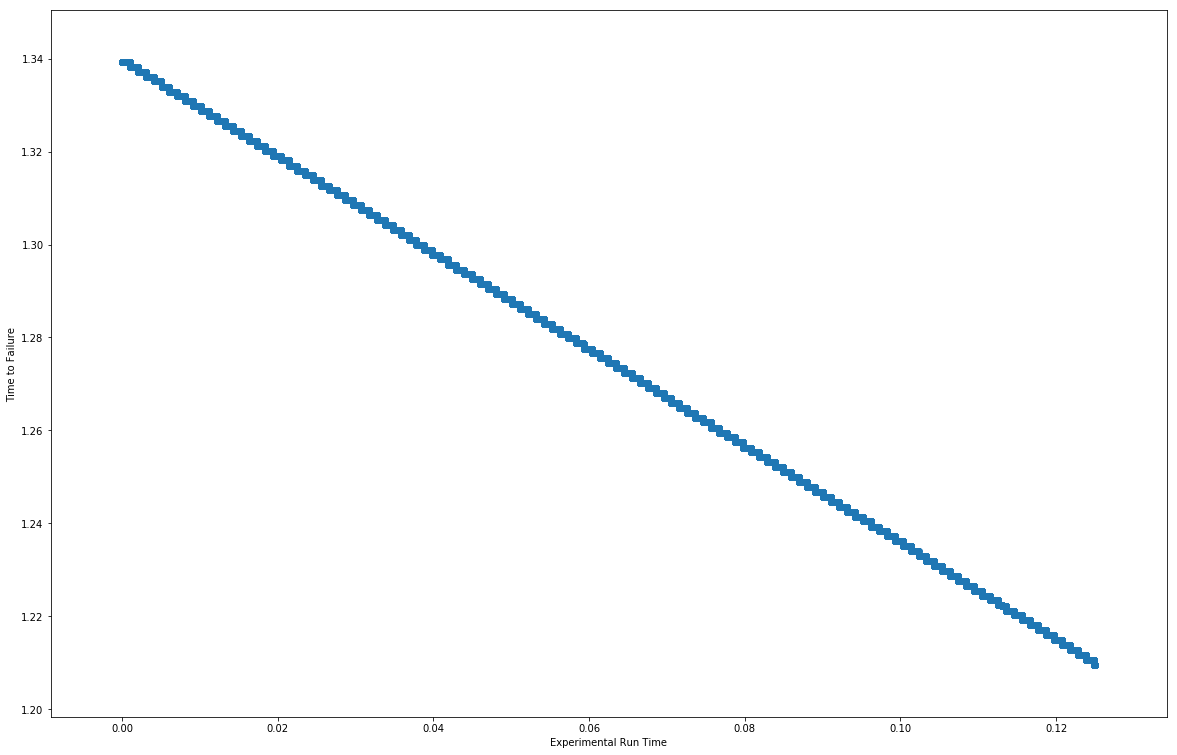

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 13)
plt.scatter(trained_dfs[1].experimental_run_time,trained_dfs[1].time_to_failure,)
plt.xlabel('Experimental Run Time')
plt.ylabel('Time to Failure')
plt.show()

In [156]:
rolling_tide=trained_dfs[1]
rolling_tide['Average']=rolling_tide.time_to_failure.rolling(150).mean()
rolling_tide.tail()

,acoustic_data,time_to_failure,experimental_run_time,ID,Average
999995,6,1.209499,0.124999,999995,1.209499
999996,5,1.209499,0.124999,999996,1.209499
999997,7,1.209499,0.124999,999997,1.209499
999998,6,1.209499,0.124999,999998,1.209499
999999,4,1.209499,0.125000,999999,1.209499


In [162]:
rolling_tide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 500000 to 999999
Data columns (total 5 columns):
acoustic_data            500000 non-null int64
time_to_failure          500000 non-null float64
experimental_run_time    500000 non-null float64
ID                       500000 non-null int64
Average                  499851 non-null float64
dtypes: float64(3), int64(2)
memory usage: 19.1 MB


In [ ]:
#See website for more code and functions for visualizing decision trees...https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Helper-Code

In [157]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(rolling_tide['acoustic_data'][: , None], rolling_tide['time_to_failure'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [159]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = rolling_tide['time_to_failure']

ValueError: x and y must have same first dimension, but have shapes (1000,) and (500000,)

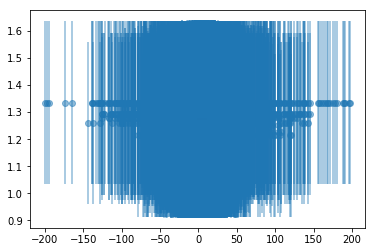

In [160]:
x = rolling_tide['acoustic_data']
y = rolling_tide['time_to_failure']
plt.errorbar(x,y, 0.3, fmt = 'o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha = 0.5);

In [165]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(rolling_tide.acoustic_data, rolling_tide.time_to_failure, random_state=0)

# model = RandomForestRegressor(n_estimators = 1000)
#model.fit(Xtrain, ytrain)
#ypred - model.predict(Xtest)

In [191]:
X = rolling_tide.experimental_run_time
y1 = rolling_tide.acoustic_data 
y2 = rolling_tide.time_to_failure


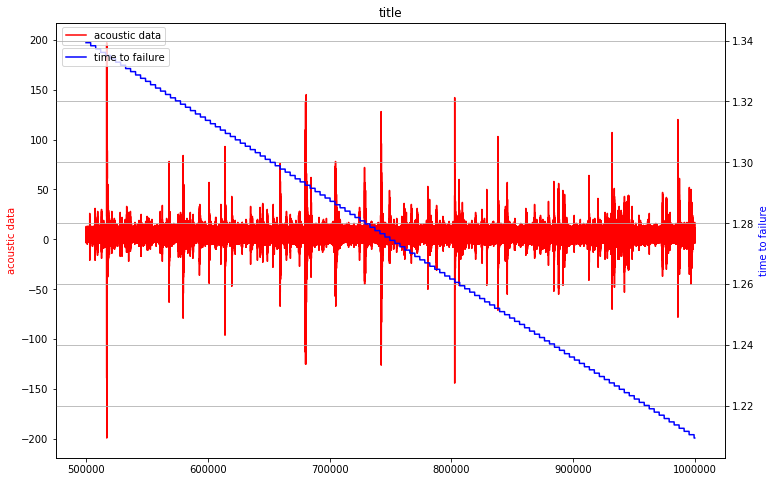

In [192]:
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.title('title')
plt.plot(y1, color='r')
ax1.set_ylabel('acoustic data', color='r')
plt.legend(['acoustic data'], loc=(0.01, 0.95))
ax2 = ax1.twinx()
plt.plot(y2, color='b')
ax2.set_ylabel('time to failure', color='b')
plt.legend(['time to failure'], loc=(0.01, 0.9))
plt.grid(True)

In [199]:
rows = chunk
segments = int(np.floor(rolling_tide.shape[0] / rows))
print("Number of segments: ", segments)


Number of segments:  3


In [ ]:
#number of segments is only 1 because I'm only pulling ot 150000 segments at a time

#code received from https://www.kaggle.com/gpreda/lanl-earthquake-eda-and-prediction

In [202]:
rolling_tide['std']=rolling_tide.acoustic_data.rolling(150).std()
rolling_tide['max']=rolling_tide.acoustic_data.rolling(150).max()
rolling_tide['min']=rolling_tide.acoustic_data.rolling(150).min()
rolling_tide['sum']=rolling_tide.acoustic_data.rolling(150).sum()
rolling_tide['average']=rolling_tide.acoustic_data.rolling(150).mean()

In [209]:
rolling_tide.tail()


,acoustic_data,time_to_failure,experimental_run_time,ID,Average,std,max,min,sum,average
999995,6,1.209499,0.124999,999995,1.209499,3.318479,17.0,-4.0,665.0,4.433333
999996,5,1.209499,0.124999,999996,1.209499,3.318607,17.0,-4.0,666.0,4.440000
999997,7,1.209499,0.124999,999997,1.209499,3.324884,17.0,-4.0,668.0,4.453333
999998,6,1.209499,0.124999,999998,1.209499,3.324884,17.0,-4.0,668.0,4.453333
999999,4,1.209499,0.125000,999999,1.209499,3.312974,17.0,-4.0,671.0,4.473333


In [212]:
#X = rolling_tide.experimental_run_time
#y1 = rolling_tide.acoustic_data 
#y2 = rolling_tide.time_to_failure


from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y1)

Xtrain =np.array(Xtrain).reshape(-1,1)
ytrain = np.array(ytrain).reshape(-1,1)

model = RandomForestRegressor()

model.fit(Xtrain, ytrain)


AttributeError: 'Series' object has no attribute 'reshape'